In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
%matplotlib inline

In [2]:
#Classical Search

In [3]:
myList = [5,4,6,9,1,2,3,7,8,0]

In [4]:
def oracle(number):
    winningNumber = 8
    if number == winningNumber:
        response = True
    else:
        response = False
    return response

In [5]:
for index, number in enumerate(myList):
    if oracle(number) is True:
        print(f"winning number index: {index}")
        print(f"execution count: {index+1}")
        break

winning number index: 8
execution count: 9


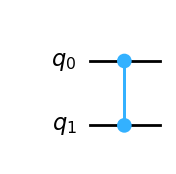

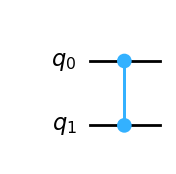

In [5]:
#Quantum Model with Grover's Algorithm
#Oracle Circuit (WinningNumber = 11)

oracleCircuit = QuantumCircuit(2,name='oracleCircuit')
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')

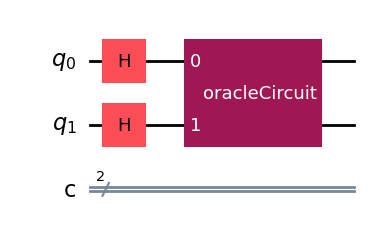

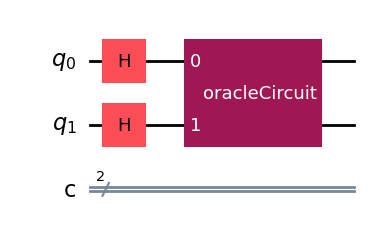

In [6]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

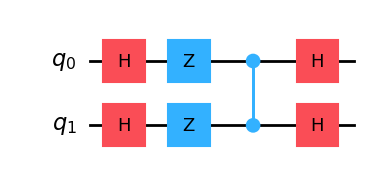

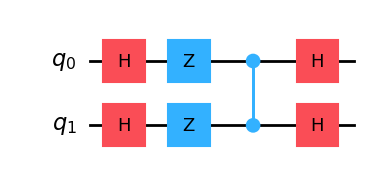

In [7]:
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

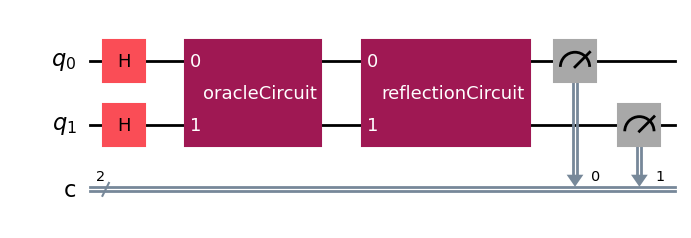

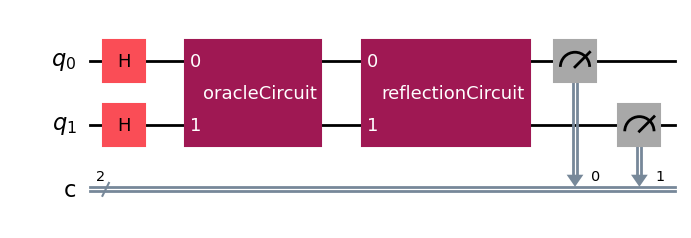

In [8]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

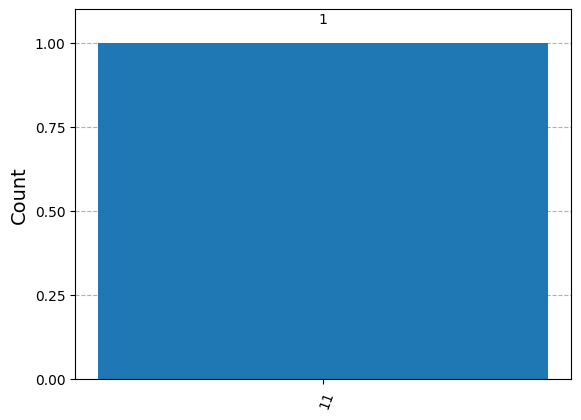

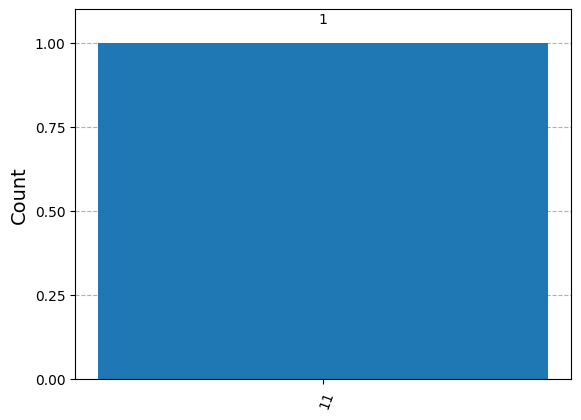

In [11]:
backend = AerSimulator()
circ = transpile(mainCircuit, backend)
result = backend.run(circ, shots=1).result()


counts = result.get_counts()
plot_histogram([counts])